In [1]:
import pandas as pd

# Sample DataFrame (replace this with your actual data)
data = {
    'maturity_value': [1000, 2000, 1500, 1200, 1800],
    'category': ['S.A', 'I.T', 'D.A', 'T.H', 'J.K'],
    'currency': ['USD', 'GBP', 'USD', 'JPY', 'GBP'],
    'amount': [500, 800, 600, 700, 900]
}
sample_df = pd.DataFrame(data)

# Create a DataFrame with 600,000 records by repeating the sample data
num_records = 600000
df = pd.concat([sample_df] * (num_records // len(sample_df)), ignore_index=True)

# Print the resulting DataFrame
print(df.head())

   maturity_value category currency  amount
0            1000      S.A      USD     500
1            2000      I.T      GBP     800
2            1500      D.A      USD     600
3            1200      T.H      JPY     700
4            1800      J.K      GBP     900


In [15]:
%%time
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Sample DataFrame (replace this with your actual data)
data = {
    'maturity_value': [1000, 2000, 1500, 1200, 1800],
    'category': ['S.A', 'I.T', 'D.A', 'T.H', 'J.K'],
    'currency': ['USD', 'GBP', 'USD', 'JPY', 'GBP'],
    'amount': [500, 800, 600, 700, 900]
}

# Create a DataFrame with 10,000 records by repeating the sample data
num_records = 1000
data_extended = {key: np.tile(values, num_records // len(values)) for key, values in data.items()}
data = pd.DataFrame(data_extended)

# Encode categorical variables
label_encoders = {}
categorical_vars = ['category', 'currency']
for var in categorical_vars:
    le = LabelEncoder()
    data[var] = le.fit_transform(data[var])
    label_encoders[var] = le
    
# Print the resulting DataFrame
#print(data.head())
data.shape

# Parameters
radius = 500  # Adjust the radius as needed
variables_to_process = ['maturity_value', 'category', 'currency', 'amount']

df = data
# Calculate density-based features for each variable
for var in variables_to_process:
    lower_bound = df[variables_to_process].sub(radius).values
    #print(lower_bound)
    upper_bound = df[variables_to_process].add(radius).values
    mask = (lower_bound <= df[var].values.reshape(-1, 1)) & (upper_bound >= df[var].values.reshape(-1, 1))
    
    # Local Density Percentile
    df[f'{var}_local_density_percentile'] = np.mean(mask, axis=1)
    
    # Local Density Ratio
    df[f'{var}_local_density_ratio'] = np.sum(mask, axis=1) / df.shape[0]
    
    # Density Ranking
    df[f'{var}_density_rank'] = np.argsort(np.argsort(np.sum(mask, axis=1))) + 1
    
    # Density Variability
    df[f'{var}_density_variability'] = np.std(np.sum(mask, axis=1))
    
    # Relative Density
    total_data_points = df.shape[0]
    df[f'{var}_relative_density'] = np.sum(mask, axis=1) / total_data_points
    
    # Inverse Density
    df[f'{var}_inverse_density'] = 1 / np.sum(mask, axis=1)
    
    # Density Percentile in Cluster (using category as a cluster)
    df[f'{var}_density_percentile_in_cluster'] = df.groupby(var)[f'{var}_local_density_ratio'].rank(pct=True)
    
    # Distance-Weighted Density
    distance_weights = np.sum(1 / np.sqrt((df[variables_to_process] - df[var].values.reshape(-1, 1))**2), axis=1)
    df[f'{var}_distance_weighted_density'] = distance_weights / (df.shape[0] - 1)
    
    # Density-Based Outlier Score
    df[f'{var}_density_outlier_score'] = df[f'{var}_local_density_ratio'] * df[f'{var}_relative_density'] / \
                                         (df[f'{var}_density_rank'] + df[f'{var}_density_variability'])
    
    # Local Density Range
    local_density_range = np.sum(mask, axis=1) - np.min(np.sum(mask, axis=1))
    df[f'{var}_local_density_range'] = local_density_range
    
    # Average Distance to Neighbors
    distance_to_neighbors = np.sum(np.sqrt((df[variables_to_process] - df[var].values.reshape(-1, 1))**2), axis=1)
    avg_distance_to_neighbors = distance_to_neighbors / (df.shape[0] - 1)
    df[f'{var}_avg_distance_to_neighbors'] = avg_distance_to_neighbors

    
    # Parameters for proximity-based features
    proximity_variable = 'maturity_value'  # Choose a variable for proximity calculation
    
    # Proximity to Neighbors
    proximity_to_neighbors = np.sum(np.abs(df[proximity_variable].values - df[var].values.reshape(-1, 1)), axis=1)
    df[f'{var}_proximity_to_{proximity_variable}'] = proximity_to_neighbors
    
    # Density in Radius
    density_in_radius = np.sum(mask, axis=1)
    df[f'{var}_density_in_{radius}radius'] = density_in_radius
    
# Print the resulting DataFrame with added features
print(df.head())

   maturity_value  category  currency  amount  \
0            1000         3         2     500   
1            2000         1         0     800   
2            1500         0         2     600   
3            1200         4         1     700   
4            1800         2         0     900   

   maturity_value_local_density_percentile  \
0                                     0.50   
1                                     0.25   
2                                     0.25   
3                                     0.50   
4                                     0.25   

   maturity_value_local_density_ratio  maturity_value_density_rank  \
0                               0.002                         1000   
1                               0.001                          596   
2                               0.001                          580   
3                               0.002                          604   
4                               0.001                          577   

   matu

In [20]:
df.shape

(2100, 56)

In [11]:
%%time
import pandas as pd
import numpy as np

# Sample DataFrame (replace this with your actual data)
data = {
    'maturity_value': [1000, 2000, 1500, 1200, 1800],
    'category': ['S.A', 'I.T', 'D.A', 'T.H', 'J.K'],
    'currency': ['USD', 'GBP', 'USD', 'JPY', 'GBP'],
    'amount': [500, 800, 600, 700, 900]
}

# Create a DataFrame with 10,000 records by repeating the sample data
num_records = 2000
data_extended = {key: np.tile(values, num_records // len(values)) for key, values in data.items()}
data = pd.DataFrame(data_extended)

# Encode categorical variables
label_encoders = {}
categorical_vars = ['category', 'currency']
for var in categorical_vars:
    le = LabelEncoder()
    data[var] = le.fit_transform(data[var])
    label_encoders[var] = le
    
# Print the resulting DataFrame
#print(data.head())
data.shape

# Parameters
radius = 500  # Adjust the radius as needed
variables_to_process = ['maturity_value', 'category', 'currency', 'amount']

df = data

# Parameters
radius = 500  # Adjust the radius as needed
variables_to_process = ['maturity_value', 'category', 'currency', 'amount']

# Convert DataFrame to NumPy array for faster processing
data_array = df[variables_to_process].values

# Calculate lower and upper bounds for efficient masking
lower_bound = data_array - radius
upper_bound = data_array + radius

# Calculate the masks for density-based features using vectorized operations
masks = (lower_bound <= data_array[:, None]) & (upper_bound >= data_array[:, None])


# Calculate density-based features using vectorized operations
for idx, var in enumerate(variables_to_process):
    # Local Density Percentile
    df[f'{var}_local_density_percentile'] = np.mean(masks[:, :, idx], axis=1)
    
    # Local Density Ratio
    df[f'{var}_local_density_ratio'] = np.sum(masks[:, :, idx], axis=1) / df.shape[0]
    
    # Density Ranking
    df[f'{var}_density_rank'] = np.argsort(np.argsort(np.sum(masks[:, :, idx], axis=1))) + 1
    
    # Density Variability
    df[f'{var}_density_variability'] = np.std(np.sum(masks[:, :, idx], axis=1))
    
    # Relative Density
    total_data_points = df.shape[0]
    df[f'{var}_relative_density'] = np.sum(masks[:, :, idx], axis=1) / total_data_points
    
    # Inverse Density
    df[f'{var}_inverse_density'] = 1 / np.sum(masks[:, :, idx], axis=1)
    
    # Density Percentile in Cluster (using category as a cluster)
    category_column = df['category'].values
    category_masks = category_column[:, None] == category_column
    df[f'{var}_density_percentile_in_cluster'] = np.mean(category_masks * masks[:, :, idx], axis=1)
    
    # Distance-Weighted Density
    distances = np.abs(data_array[:, idx][:, None] - data_array[:, idx])
    distance_weights = 1 / (distances + 1e-6)
    distance_weighted_density = np.sum(distance_weights, axis=1)
    df[f'{var}_distance_weighted_density'] = distance_weighted_density / distance_weights.shape[1]
    
    # Density-Based Outlier Score
    df[f'{var}_density_outlier_score'] = (df[f'{var}_local_density_ratio'] * 
                                          df[f'{var}_relative_density'] / 
                                          (df[f'{var}_density_rank'] + df[f'{var}_density_variability']))
    
    # Local Density Range
    df[f'{var}_local_density_range'] = np.sum(masks[:, :, idx], axis=1) - np.min(masks[:, :, idx], axis=1)
    
    # Average Distance to Neighbors
    avg_distance_to_neighbors = np.sum(distances * masks[:, :, idx], axis=1) / np.sum(masks[:, :, idx], axis=1)
    df[f'{var}_avg_distance_to_neighbors'] = avg_distance_to_neighbors
    
    # Proximity to proximity_variable
    proximity_column = df['maturity_value'].values  # Replace with the actual column name
    proximity_masks = proximity_column[:, None] == proximity_column
    df[f'{var}_proximity_to_proximity_variable'] = np.mean(proximity_masks * masks[:, :, idx], axis=1)
    
    # Density in radius
    density_in_radius = np.sum(masks[:, :, idx], axis=1)
    df[f'{var}_density_in_{radius}radius'] = density_in_radius

# Print the resulting DataFrame with added features
print(df.head())


   maturity_value  category  currency  amount  \
0            1000         3         2     500   
1            2000         1         0     800   
2            1500         0         2     600   
3            1200         4         1     700   
4            1800         2         0     900   

   maturity_value_local_density_percentile  \
0                                      0.6   
1                                      0.6   
2                                      1.0   
3                                      0.6   
4                                      0.6   

   maturity_value_local_density_ratio  maturity_value_density_rank  \
0                                 0.6                            1   
1                                 0.6                         1184   
2                                 1.0                         1705   
3                                 0.6                         1183   
4                                 0.6                         1182   

   matu

In [19]:
df.head()

,maturity_value,category,currency,amount,maturity_value_local_density_percentile,maturity_value_local_density_ratio,maturity_value_density_rank,maturity_value_density_variability,maturity_value_relative_density,maturity_value_inverse_density,maturity_value_density_percentile_in_cluster,maturity_value_distance_weighted_density,maturity_value_density_outlier_score,maturity_value_local_density_range,maturity_value_avg_distance_to_neighbors,maturity_value_proximity_to_maturity_value,maturity_value_density_in_500radius,category_local_density_percentile,category_local_density_ratio,category_density_rank,category_density_variability,category_relative_density,category_inverse_density,category_density_percentile_in_cluster,category_distance_weighted_density,category_density_outlier_score,category_local_density_range,category_avg_distance_to_neighbors,category_proximity_to_maturity_value,category_density_in_500radius,currency_local_density_percentile,currency_local_density_ratio,currency_density_rank,currency_density_variability,currency_relative_density,currency_inverse_density,currency_density_percentile_in_cluster,currency_distance_weighted_density,currency_density_outlier_score,currency_local_density_range,currency_avg_distance_to_neighbors,currency_proximity_to_maturity_value,currency_density_in_500radius,amount_local_density_percentile,amount_local_density_ratio,amount_density_rank,amount_density_variability,amount_relative_density,amount_inverse_density,amount_density_percentile_in_cluster,amount_distance_weighted_density,amount_density_outlier_score,amount_local_density_range,amount_avg_distance_to_neighbors,amount_proximity_to_maturity_value,amount_density_in_500radius
0,1000,3,2,500,0.50,0.002,1000,0.489898,0.002,0.5,0.5025,inf,3.998041e-09,1,2.497497,500000,2,0.75,0.003,1000,0.4,0.003,0.333333,0.5025,inf,8.996401e-09,1,1.496496,1497000,3,0.75,0.003,1000,0.4,0.003,0.333333,0.75125,inf,8.996401e-09,1,1.498498,1498000,3,1.00,0.004,1000,1.16619,0.004,0.25,0.5025,inf,1.598136e-08,3,1.496496,1000000,4
1,2000,1,0,800,0.25,0.001,596,0.489898,0.001,1.0,0.5025,inf,1.676474e-09,0,5.204204,500000,1,0.50,0.002,759,0.4,0.002,0.500000,0.5025,inf,5.267316e-09,0,2.801802,1499000,2,0.50,0.002,759,0.4,0.002,0.500000,0.50125,inf,5.267316e-09,0,2.803804,1500000,2,0.25,0.001,583,1.16619,0.001,1.00,0.5025,inf,1.711842e-09,0,2.801802,700000,1
2,1500,0,2,600,0.25,0.001,580,0.489898,0.001,1.0,0.5025,inf,1.722683e-09,0,3.901902,320000,1,0.50,0.002,729,0.4,0.002,0.500000,0.5025,inf,5.483959e-09,0,2.104104,1500000,2,0.50,0.002,729,0.4,0.002,0.500000,0.25125,inf,5.483959e-09,0,2.100100,1498000,2,0.25,0.001,590,1.16619,0.001,1.00,0.5025,inf,1.691572e-09,0,2.100100,900000,1
3,1200,4,1,700,0.50,0.002,604,0.489898,0.002,0.5,0.5025,inf,6.617149e-09,1,2.897898,380000,2,0.50,0.002,793,0.4,0.002,0.500000,0.5025,inf,5.041593e-09,0,1.896897,1496000,2,0.50,0.002,793,0.4,0.002,0.500000,0.50250,inf,5.041593e-09,0,1.902903,1499000,2,0.50,0.002,670,1.16619,0.002,0.50,0.5025,inf,5.959776e-09,1,1.896897,800000,2
4,1800,2,0,900,0.25,0.001,577,0.489898,0.001,1.0,0.5025,inf,1.731632e-09,0,4.502503,380000,1,0.50,0.002,781,0.4,0.002,0.500000,0.5025,inf,5.119017e-09,0,2.700701,1498000,2,0.50,0.002,781,0.4,0.002,0.500000,0.50125,inf,5.119017e-09,0,2.704705,1500000,2,0.25,0.001,578,1.16619,0.001,1.00,0.5025,inf,1.726620e-09,0,2.700701,600000,1


In [21]:
import pandas as pd
import numpy as np

# Sample DataFrame with some infinite values
data = {
    'col1': [np.inf, np.inf, np.inf, np.inf, np.inf],
    'col2': [np.nan, 2, 3, 4, 5],
    'col3': [1, 2, 3, 4, 5]
}
df1 = pd.DataFrame(data)

# Check for columns with all infinite values
columns_with_all_inf = df1.columns[df1.isin([np.inf]).all()]

# Remove columns with all infinite values
df1 = df1.drop(columns=columns_with_all_inf)

print(df1)


   col2  col3
0   NaN     1
1   2.0     2
2   3.0     3
3   4.0     4
4   5.0     5


In [23]:
from sklearn.preprocessing import StandardScaler

# Check for columns with all infinite values
columns_with_all_inf = df.columns[df.isin([np.inf]).all()]
print(columns_with_all_inf)
# Remove columns with all infinite values
df = df.drop(columns=columns_with_all_inf)

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df)

Index(['maturity_value_distance_weighted_density',
       'category_distance_weighted_density',
       'currency_distance_weighted_density',
       'amount_distance_weighted_density'],
      dtype='object')


In [28]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

df = df

# Perform PCA to determine feature importance
pca = PCA(n_components=len(df.columns))
pca.fit(df)
explained_variance_ratio = pca.explained_variance_ratio_
sorted_features = np.argsort(explained_variance_ratio)[::-1]
significant_features = df.columns[sorted_features]

print("PCA: Most significant features by explained variance ratio")
print(significant_features)




PCA: Most significant features by explained variance ratio
Index(['maturity_value', 'category', 'currency', 'amount',
       'maturity_value_local_density_percentile',
       'maturity_value_local_density_ratio', 'maturity_value_density_rank',
       'maturity_value_density_variability', 'maturity_value_relative_density',
       'maturity_value_inverse_density',
       'maturity_value_density_percentile_in_cluster',
       'category_local_density_ratio', 'category_density_outlier_score',
       'category_density_percentile_in_cluster', 'category_inverse_density',
       'category_relative_density', 'category_density_variability',
       'category_density_rank', 'maturity_value_local_density_range',
       'category_local_density_percentile',
       'maturity_value_density_in_500radius',
       'maturity_value_proximity_to_maturity_value',
       'maturity_value_avg_distance_to_neighbors',
       'amount_proximity_to_maturity_value',
       'maturity_value_density_outlier_score', 'categ

In [25]:
df.shape

(1000, 52)

In [32]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
# Calculate percentiles for comparison
# Calculate percentiles for comparison
percentiles = np.percentile(df, [10, 90], axis=0)

significant_features = []

# Perform Kolmogorov-Smirnov test to compare feature distributions
for feature in df.columns:
    _, p_value = ks_2samp(df[feature][df[feature] <= percentiles[0][df.columns.get_loc(feature)]],
                          df[feature][df[feature] >= percentiles[1][df.columns.get_loc(feature)]])
    
    if p_value < 0.05:
        significant_features.append(feature)

print("Significant features based on feature distributions:")
print(len(significant_features))



Significant features based on feature distributions:
45


In [33]:
df.head()

,maturity_value,category,currency,amount,maturity_value_local_density_percentile,maturity_value_local_density_ratio,maturity_value_density_rank,maturity_value_density_variability,maturity_value_relative_density,maturity_value_inverse_density,maturity_value_density_percentile_in_cluster,maturity_value_density_outlier_score,maturity_value_local_density_range,maturity_value_avg_distance_to_neighbors,maturity_value_proximity_to_maturity_value,maturity_value_density_in_500radius,category_local_density_percentile,category_local_density_ratio,category_density_rank,category_density_variability,category_relative_density,category_inverse_density,category_density_percentile_in_cluster,category_density_outlier_score,category_local_density_range,category_avg_distance_to_neighbors,category_proximity_to_maturity_value,category_density_in_500radius,currency_local_density_percentile,currency_local_density_ratio,currency_density_rank,currency_density_variability,currency_relative_density,currency_inverse_density,currency_density_percentile_in_cluster,currency_density_outlier_score,currency_local_density_range,currency_avg_distance_to_neighbors,currency_proximity_to_maturity_value,currency_density_in_500radius,amount_local_density_percentile,amount_local_density_ratio,amount_density_rank,amount_density_variability,amount_relative_density,amount_inverse_density,amount_density_percentile_in_cluster,amount_density_outlier_score,amount_local_density_range,amount_avg_distance_to_neighbors,amount_proximity_to_maturity_value,amount_density_in_500radius
0,1000,3,2,500,0.50,0.002,1000,0.489898,0.002,0.5,0.5025,3.998041e-09,1,2.497497,500000,2,0.75,0.003,1000,0.4,0.003,0.333333,0.5025,8.996401e-09,1,1.496496,1497000,3,0.75,0.003,1000,0.4,0.003,0.333333,0.75125,8.996401e-09,1,1.498498,1498000,3,1.00,0.004,1000,1.16619,0.004,0.25,0.5025,1.598136e-08,3,1.496496,1000000,4
1,2000,1,0,800,0.25,0.001,596,0.489898,0.001,1.0,0.5025,1.676474e-09,0,5.204204,500000,1,0.50,0.002,759,0.4,0.002,0.500000,0.5025,5.267316e-09,0,2.801802,1499000,2,0.50,0.002,759,0.4,0.002,0.500000,0.50125,5.267316e-09,0,2.803804,1500000,2,0.25,0.001,583,1.16619,0.001,1.00,0.5025,1.711842e-09,0,2.801802,700000,1
2,1500,0,2,600,0.25,0.001,580,0.489898,0.001,1.0,0.5025,1.722683e-09,0,3.901902,320000,1,0.50,0.002,729,0.4,0.002,0.500000,0.5025,5.483959e-09,0,2.104104,1500000,2,0.50,0.002,729,0.4,0.002,0.500000,0.25125,5.483959e-09,0,2.100100,1498000,2,0.25,0.001,590,1.16619,0.001,1.00,0.5025,1.691572e-09,0,2.100100,900000,1
3,1200,4,1,700,0.50,0.002,604,0.489898,0.002,0.5,0.5025,6.617149e-09,1,2.897898,380000,2,0.50,0.002,793,0.4,0.002,0.500000,0.5025,5.041593e-09,0,1.896897,1496000,2,0.50,0.002,793,0.4,0.002,0.500000,0.50250,5.041593e-09,0,1.902903,1499000,2,0.50,0.002,670,1.16619,0.002,0.50,0.5025,5.959776e-09,1,1.896897,800000,2
4,1800,2,0,900,0.25,0.001,577,0.489898,0.001,1.0,0.5025,1.731632e-09,0,4.502503,380000,1,0.50,0.002,781,0.4,0.002,0.500000,0.5025,5.119017e-09,0,2.700701,1498000,2,0.50,0.002,781,0.4,0.002,0.500000,0.50125,5.119017e-09,0,2.704705,1500000,2,0.25,0.001,578,1.16619,0.001,1.00,0.5025,1.726620e-09,0,2.700701,600000,1


In [36]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import time

# Assuming significant_variables is a list of significant variable names
X = df[significant_features]

# Dimensionality Reduction using PCA
start_time = time.time()
pca = PCA(n_components=0.95)  # Adjust explained variance ratio as needed
X_reduced = pca.fit_transform(X)
print(f"Dimensionality reduction time: {time.time() - start_time:.2f} seconds")

X_reduced

Dimensionality reduction time: 0.01 seconds


array([[ 206098.46077093,  -67692.63371056],
       [ -92945.98155373,  -91747.27291703],
       [  91980.63152766,  103719.61768429],
       ...,
       [  91979.02063784,  103721.3146396 ],
       [  -2884.72952331,   35875.35407508],
       [-202245.5115779 ,   19842.15604284]])

In [38]:
from sklearn.decomposition import PCA

# Assuming significant_variables is a list of significant variable names
X = df[significant_features]

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine Number of Components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Step 3: Retain Interpretability
selected_pca = PCA(n_components=num_components)
X_selected_pca = selected_pca.fit_transform(X_scaled)

# Step 4: Post-PCA Analysis
loading_scores = selected_pca.components_.T

# Print the loading scores for each principal component
for i, component in enumerate(loading_scores):
    print(f"Principal Component {i + 1}:")
    for var, score in zip(significant_features, component):
        print(f"{var}: {score:.4f}")
    print()

# Use X_selected_pca for further analysis or modeling


Principal Component 1:
maturity_value: -0.1612
category: -0.1469
currency: -0.1528
amount: -0.0202
maturity_value_local_density_percentile: 0.0036

Principal Component 2:
maturity_value: 0.1088
category: 0.2789
currency: -0.2383
amount: 0.0342
maturity_value_local_density_percentile: -0.0093

Principal Component 3:
maturity_value: 0.1176
category: -0.0172
currency: 0.3850
amount: -0.0015
maturity_value_local_density_percentile: 0.0022

Principal Component 4:
maturity_value: -0.1419
category: 0.0443
currency: -0.2912
amount: 0.0014
maturity_value_local_density_percentile: 0.0267

Principal Component 5:
maturity_value: 0.1565
category: 0.2174
currency: -0.0529
amount: 0.0263
maturity_value_local_density_percentile: -0.0238

Principal Component 6:
maturity_value: 0.1565
category: 0.2174
currency: -0.0529
amount: 0.0263
maturity_value_local_density_percentile: -0.0238

Principal Component 7:
maturity_value: 0.1368
category: 0.1945
currency: -0.0571
amount: -0.0903
maturity_value_local_dens

In [41]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

# Assuming X_selected_pca is the PCA-transformed data from the previous code snippet
# Assuming df is your original DataFrame

# Subsample a portion of the data
sample_size = min(50000, len(X_selected_pca))  # Adjust the sample size as needed
X_sampled = X_selected_pca[np.random.choice(len(X_selected_pca), size=sample_size, replace=False)]

# Create and fit the Isolation Forest model
model = IsolationForest(contamination=0.05, n_estimators=100, max_samples=0.5, n_jobs=-1)
model.fit(X_sampled)

# Predict anomalies
predictions = model.predict(X_selected_pca)

# Add predictions to the original DataFrame
df['anomaly'] = np.where(predictions == -1, True, False)

# Print the original DataFrame with the added "anomaly" column
print(df)


     maturity_value  category  currency  amount  \
0              1000         3         2     500   
1              2000         1         0     800   
2              1500         0         2     600   
3              1200         4         1     700   
4              1800         2         0     900   
..              ...       ...       ...     ...   
995            1000         3         2     500   
996            2000         1         0     800   
997            1500         0         2     600   
998            1200         4         1     700   
999            1800         2         0     900   

     maturity_value_local_density_percentile  \
0                                       0.50   
1                                       0.25   
2                                       0.25   
3                                       0.50   
4                                       0.25   
..                                       ...   
995                                     0.50   
996

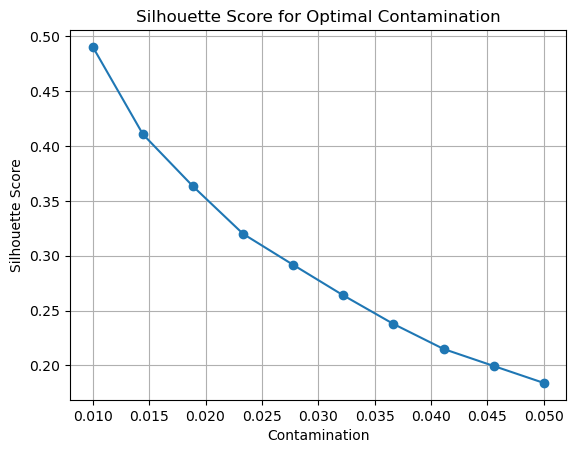

Optimal Contamination: 0.01
     maturity_value  category  currency  amount  \
0              1000         3         2     500   
1              2000         1         0     800   
2              1500         0         2     600   
3              1200         4         1     700   
4              1800         2         0     900   
..              ...       ...       ...     ...   
995            1000         3         2     500   
996            2000         1         0     800   
997            1500         0         2     600   
998            1200         4         1     700   
999            1800         2         0     900   

     maturity_value_local_density_percentile  \
0                                       0.50   
1                                       0.25   
2                                       0.25   
3                                       0.50   
4                                       0.25   
..                                       ...   
995                    

In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import silhouette_score

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

# Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(data)

# Range of contamination values to try
contamination_values = np.linspace(0.01, 0.05, 10)

# Evaluate different contamination values using silhouette score
silhouette_scores = []
for contamination in contamination_values:
    iso_forest = IsolationForest(contamination=contamination, random_state=42, n_estimators=100, max_samples=0.5, n_jobs=-1)
    iso_forest.fit(X_selected_pca)
    labels = iso_forest.predict(X_selected_pca)
    silhouette_scores.append(silhouette_score(X_selected_pca, labels))

# Plot the silhouette scores to determine the optimal contamination value
plt.plot(contamination_values, silhouette_scores, marker='o')
plt.xlabel('Contamination')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Contamination')
plt.grid()
plt.show()

# Choose the optimal contamination value that maximizes the silhouette score
optimal_contamination = contamination_values[np.argmax(silhouette_scores)]
print(f'Optimal Contamination: {optimal_contamination:.2f}')

# Train the Isolation Forest model using the optimal contamination value
iso_forest = IsolationForest(contamination=optimal_contamination, random_state=42)
iso_forest.fit(X_selected_pca)
anomaly_predictions = iso_forest.predict(X_selected_pca)

# Add 'anomaly' column to the DataFrame
df['anomaly'] = np.where(anomaly_predictions == -1, True, False)

# Display the updated dataframe
print(df)

In [44]:
df['anomaly'].value_counts()

False    990
True      10
Name: anomaly, dtype: int64

In [53]:
from sklearn.decomposition import PCA

# Assuming significant_variables is a list of significant variable names
X = df[significant_features]

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine Number of Components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Step 3: Retain Interpretability
selected_pca = PCA(n_components=num_components)
X_selected_pca = selected_pca.fit_transform(X_scaled)

# Step 4: Post-PCA Analysis
loading_scores = selected_pca.components_.T

# Randomly select a subset of variables to display loading scores
num_variables_to_display = 20  # Adjust the number of variables to display
randomly_selected_variables = np.random.choice(significant_features, size=num_variables_to_display, replace=False)

print(randomly_selected_variables)
# Print the loading scores for each principal component for the randomly selected variables
for i, component in enumerate(loading_scores):
    print(f"Principal Component {i + 1}:")
    for var, score in zip(randomly_selected_variables,component):
        print(f"{var}: {score:.4f}")
    print()

# Use X_selected_pca for further analysis or modeling


['amount_proximity_to_maturity_value' 'category_local_density_percentile'
 'amount_relative_density' 'maturity_value_avg_distance_to_neighbors'
 'category_local_density_ratio' 'amount_inverse_density' 'currency'
 'amount_local_density_ratio' 'currency_inverse_density'
 'currency_density_rank' 'currency_density_outlier_score'
 'maturity_value_density_in_500radius' 'currency_local_density_range'
 'currency_proximity_to_maturity_value' 'amount_density_outlier_score'
 'currency_density_percentile_in_cluster' 'currency_density_in_500radius'
 'category_relative_density' 'amount_avg_distance_to_neighbors'
 'category_proximity_to_maturity_value']
Principal Component 1:
amount_proximity_to_maturity_value: -0.1612
category_local_density_percentile: -0.1469
amount_relative_density: -0.1528
maturity_value_avg_distance_to_neighbors: -0.0202
category_local_density_ratio: 0.0036

Principal Component 2:
amount_proximity_to_maturity_value: 0.1088
category_local_density_percentile: 0.2789
amount_relativ

In [54]:
randomly_selected_variables

array(['amount_proximity_to_maturity_value',
       'category_local_density_percentile', 'amount_relative_density',
       'maturity_value_avg_distance_to_neighbors',
       'category_local_density_ratio', 'amount_inverse_density',
       'currency', 'amount_local_density_ratio',
       'currency_inverse_density', 'currency_density_rank',
       'currency_density_outlier_score',
       'maturity_value_density_in_500radius',
       'currency_local_density_range',
       'currency_proximity_to_maturity_value',
       'amount_density_outlier_score',
       'currency_density_percentile_in_cluster',
       'currency_density_in_500radius', 'category_relative_density',
       'amount_avg_distance_to_neighbors',
       'category_proximity_to_maturity_value'], dtype='<U42')

In [55]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

# Assuming df is your original DataFrame
# Assuming randomly_selected_variables is a list of randomly selected significant variable names

# Step 1: Select the variables for PCA analysis
X_pca_input = df[randomly_selected_variables]

# Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# Step 3: Perform PCA
num_components = 5  # You can choose the number of components based on your needs
pca = PCA(n_components=num_components)
X_selected_pca = pca.fit_transform(X_scaled)

# Step 4: Create and fit the Isolation Forest model
model = IsolationForest(contamination=0.05, n_estimators=100, max_samples=0.5, n_jobs=-1)
model.fit(X_selected_pca)

# Predict anomalies
predictions = model.predict(X_selected_pca)

# Add predictions to the original DataFrame
df['anomaly'] = np.where(predictions == -1, True, False)

# Print the original DataFrame with the added "anomaly" column
print(df)


     maturity_value  category  currency  amount  \
0              1000         3         2     500   
1              2000         1         0     800   
2              1500         0         2     600   
3              1200         4         1     700   
4              1800         2         0     900   
..              ...       ...       ...     ...   
995            1000         3         2     500   
996            2000         1         0     800   
997            1500         0         2     600   
998            1200         4         1     700   
999            1800         2         0     900   

     maturity_value_local_density_percentile  \
0                                       0.50   
1                                       0.25   
2                                       0.25   
3                                       0.50   
4                                       0.25   
..                                       ...   
995                                     0.50   
996